In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import astropy
from astropy.time import Time

In [2]:
#tranist information

names=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[2],dtype='string')
tdur=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[10])
midtimejd=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[15])
midair=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[16])

#astropy time object
t=Time(midtimejd, format='jd', scale='utc')

In [3]:
#find unique objects and save number of transits
uniquenames=np.array([])
numtrans=np.array([])

for n in names:
    if not n in uniquenames:
        uniquenames=np.append(uniquenames,n)
        numtrans=np.append(numtrans,0)
    if n in uniquenames:
        ind=np.where(uniquenames==n)[0]
        numtrans[ind]+=1

#save file to upload to exoplanet archive for object data
namesave=open('BPlanets.txt','w')
for n in uniquenames:
    namesave.write('{0}\n'.format(n))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [4]:
#load in exoplanetarchive savefile
#save all columns for this to work
planetname=np.genfromtxt('planets.csv',delimiter=',',usecols=[70],skip_header=407,dtype='string')

hostname=np.genfromtxt('planets.csv',delimiter=',',usecols=[1],skip_header=407,dtype='string')
planetletter=np.genfromtxt('planets.csv',delimiter=',',usecols=[2],skip_header=407,dtype='string')

planetmass=np.genfromtxt('planets.csv',delimiter=',',usecols=[21],skip_header=407,filling_values='Nan')
planetradius=np.genfromtxt('planets.csv',delimiter=',',usecols=[26],skip_header=407,filling_values='Nan')#/10.864
planetdensity=np.genfromtxt('planets.csv',delimiter=',',usecols=[30],skip_header=407,filling_values='Nan')
planetau=np.genfromtxt('planets.csv',delimiter=',',usecols=[9],skip_header=407,filling_values='Nan')

mag=np.genfromtxt('planets.csv',delimiter=',',usecols=[46],skip_header=407,filling_values='Nan')
starradius=np.genfromtxt('planets.csv',delimiter=',',usecols=[64],skip_header=407,filling_values='Nan')
startemp=np.genfromtxt('planets.csv',delimiter=',',usecols=[54],skip_header=407,filling_values='Nan')

transit=np.genfromtxt('planets.csv',delimiter=',',usecols=[128],skip_header=407,filling_values='Nan')

In [5]:
massjup=1.89*10**30
radjup=7.140*10**9

JOVIANSmass=(1.0,0.29941,0.053953,0.0457346)
JOVIANSdens=(1.3262,0.6871,1.638,1.27)
JOVIANSrads=(1.0,0.8286,0.35494,0.36526)

EARTHmass=(0.003146)
EARTHdens=(5.515)
EARTHrads=(0.092051)

In [6]:
#WASP 4b#
p=30
planetmass[p]=1.237
planetdensity[p]=0.612
planetau[p]=0.023

#Wasp 29b#
mag[107]=11.3

#HP26m=planetmass[26]
#HP26r=planetradius[26]
#HP26d=planetdensity[26]

#HP26mag=mag[26]
#HP26sr=starradius[26]

[ 0.07943282  0.11220185  0.15848932]


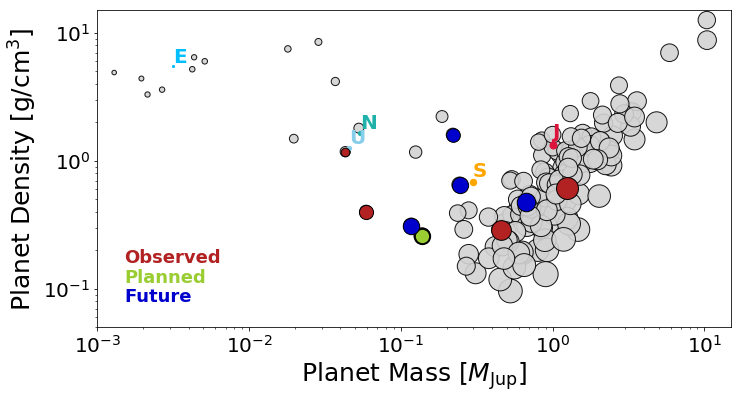

In [7]:
#obsc='gold'
#futc='cornflowerblue'
obsc='firebrick'
futc='mediumblue'

plt.figure(figsize=(11,5.5))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.15,right=0.95)
plt.scatter(planetmass,planetdensity,s=300*planetradius,c='lightgrey',edgecolor='black',alpha=0.9)
plt.plot(planetmass[64],planetdensity[64],'.',markersize=35*planetradius[64],markerfacecolor='yellowgreen',markeredgecolor='black',markeredgewidth=2.0)
#plt.plot(planetmass[107],planetdensity[107],'.',markersize=40*planetradius[107],markerfacecolor='yellowgreen',markeredgecolor='black',markeredgewidth=2.0)
plt.plot(planetmass[43],planetdensity[43],'.',markersize=50*planetradius[43],markerfacecolor=obsc,markeredgecolor='black')
plt.plot(planetmass[30],planetdensity[30],'.',markersize=33*planetradius[30],markerfacecolor=obsc,markeredgecolor='black')
plt.plot(planetmass[23],planetdensity[23],'.',markersize=31*planetradius[23],markerfacecolor=obsc,markeredgecolor='black')
plt.plot(planetmass[163],planetdensity[163],'.',markersize=50*planetradius[163],markerfacecolor=obsc,markeredgecolor='black')

plt.plot(planetmass[103],planetdensity[103],'.',markersize=48*planetradius[103],markerfacecolor=futc,markeredgecolor='black')
plt.plot(planetmass[105],planetdensity[105],'.',markersize=41*planetradius[105],markerfacecolor=futc,markeredgecolor='black')
#plt.plot(planetmass[64],planetdensity[64],'.',markersize=41*planetradius[64],markerfacecolor=futc,markeredgecolor='black')
plt.plot(planetmass[107],planetdensity[107],'.',markersize=41*planetradius[107],markerfacecolor=futc,markeredgecolor='black')
plt.plot(planetmass[26],planetdensity[26],'.',markersize=31*planetradius[26],markerfacecolor=futc,markeredgecolor='black')

#plt.text(planetmass[43],planetdensity[43],'d',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')
#plt.text(planetmass[30],planetdensity[30],'b',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')
#plt.text(planetmass[23],planetdensity[23],'c',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')
#plt.text(planetmass[163]+0.008,planetdensity[163]-0.08,'a',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')

plt.scatter(JOVIANSmass[0],JOVIANSdens[0],c='crimson',s=50*JOVIANSrads[0])
plt.scatter(JOVIANSmass[1],JOVIANSdens[1],c='orange',s=50*JOVIANSrads[1])
plt.scatter(JOVIANSmass[2],JOVIANSdens[2],c='lightseagreen',s=50*JOVIANSrads[2])
plt.scatter(JOVIANSmass[3],JOVIANSdens[3],c='skyblue',s=50*JOVIANSrads[3])
plt.scatter(EARTHmass,EARTHdens,c='deepskyblue',s=50*EARTHrads)
plt.text(JOVIANSmass[0],JOVIANSdens[0]+0.18,'J',color='crimson',fontsize=20,fontweight='bold')
plt.text(JOVIANSmass[1],JOVIANSdens[1]+0.06,'S',color='orange',fontsize=20,fontweight='bold')
plt.text(JOVIANSmass[2],JOVIANSdens[2]+0.15,'N',color='lightseagreen',fontsize=20,fontweight='bold')
plt.text(JOVIANSmass[3],JOVIANSdens[3]+0.08,'U',color='skyblue',fontsize=20,fontweight='bold')

#for i in range(0,len(planetname)):
#    if not np.isfinite(planetmass[i]) or not np.isfinite(planetdensity[i]):
#        continue
#    if planetdensity[i]>10**-1 and planetdensity[i]<1.5*10**1:
#        plt.text(planetmass[i],planetdensity[i],str(int(i)),color='black')
plt.text(EARTHmass,EARTHdens+.3,'E',color='deepskyblue',fontsize=20,fontweight='bold')
#plt.figtext(0.43,0.48,'Wasp-29b', color='yellowgreen', fontsize=18,fontweight='bold')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.5*10**-1,1.5*10**1)
plt.xlim(10**-3,1.5*10**1)
#plt.xlim(9,14)
plt.tick_params(labelsize=20)
#plt.legend(loc='lower right',fontsize=15,scatterpoints=1)
plt.xlabel('$\mathrm{Planet}$ $\mathrm{Mass}$ [$M_{\mathrm{Jup}}$]',fontsize=25)
plt.ylabel('$\mathrm{Planet}$ $\mathrm{Density}$ [$\mathrm{g/cm^3}$]',fontsize=25)

p=np.logspace(-1.1,-0.8,num=3)
print p

plt.annotate('Observed',xy=(0.0015,p[2]),color=obsc,fontsize=18,fontweight='bold')
plt.annotate('Planned',xy=(0.0015,p[1]),color='yellowgreen',fontsize=18,fontweight='bold')
plt.annotate('Future',xy=(0.0015,p[0]),color=futc,fontsize=18,fontweight='bold')

plt.savefig('poster_densmass_rad.pdf',transparent=True)

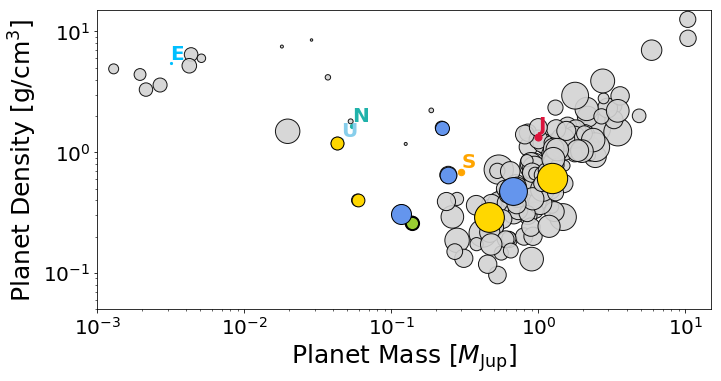

In [54]:
#obsc='gold'


trans=(planetradius/starradius)**2.

plt.figure(figsize=(11,5.5))
plt.scatter(planetmass,planetdensity,s=300*trans,c='lightgrey',edgecolor='black',alpha=0.9)
plt.plot(planetmass[64],planetdensity[64],'.',markersize=41*trans[64],markerfacecolor='yellowgreen',markeredgecolor='black',markeredgewidth=2.0)
#plt.plot(planetmass[107],planetdensity[107],'.',markersize=40*trans[107],markerfacecolor='yellowgreen',markeredgecolor='black',markeredgewidth=2.0)
plt.plot(planetmass[43],planetdensity[43],'.',markersize=50*trans[43],markerfacecolor=obsc,markeredgecolor='black')
plt.plot(planetmass[30],planetdensity[30],'.',markersize=29*trans[30],markerfacecolor=obsc,markeredgecolor='black')
plt.plot(planetmass[23],planetdensity[23],'.',markersize=23*trans[23],markerfacecolor=obsc,markeredgecolor='black')
plt.plot(planetmass[163],planetdensity[163],'.',markersize=50*trans[163],markerfacecolor=obsc,markeredgecolor='black')

#plt.plot(planetmass[26],planetdensity[26],'.',markersize=30*trans[26],markerfacecolor=futc,markeredgecolor='black')
plt.plot(planetmass[103],planetdensity[103],'.',markersize=51*trans[103],markerfacecolor=futc,markeredgecolor='black')
plt.plot(planetmass[105],planetdensity[105],'.',markersize=40*trans[105],markerfacecolor=futc,markeredgecolor='black')
plt.plot(planetmass[107],planetdensity[107],'.',markersize=35*trans[107],markerfacecolor=futc,markeredgecolor='black')
plt.plot(planetmass[26],planetdensity[26],'.',markersize=31*trans[26],markerfacecolor=futc,markeredgecolor='black')
#plt.plot(planetmass[64],planetdensity[64],'.',markersize=43*trans[64],markerfacecolor=futc,markeredgecolor='black')

#plt.text(planetmass[43],planetdensity[43],'d',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')
#plt.text(planetmass[30],planetdensity[30],'b',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')
#plt.text(planetmass[23],planetdensity[23],'c',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')
#plt.text(planetmass[163],planetdensity[163],'a',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')

plt.scatter(JOVIANSmass[0],JOVIANSdens[0],c='crimson',s=50*JOVIANSrads[0])
plt.scatter(JOVIANSmass[1],JOVIANSdens[1],c='orange',s=50*JOVIANSrads[1])
plt.scatter(JOVIANSmass[2],JOVIANSdens[2],c='lightseagreen',s=50*JOVIANSrads[2])
plt.scatter(JOVIANSmass[3],JOVIANSdens[3],c='skyblue',s=50*JOVIANSrads[3])
plt.scatter(EARTHmass,EARTHdens,c='deepskyblue',s=50*EARTHrads)
plt.text(JOVIANSmass[0],JOVIANSdens[0]+0.18,'J',color='crimson',fontsize=20,fontweight='bold')
plt.text(JOVIANSmass[1],JOVIANSdens[1]+0.06,'S',color='orange',fontsize=20,fontweight='bold')
plt.text(JOVIANSmass[2],JOVIANSdens[2]+0.15,'N',color='lightseagreen',fontsize=20,fontweight='bold')
plt.text(JOVIANSmass[3],JOVIANSdens[3]+0.08,'U',color='skyblue',fontsize=20,fontweight='bold')

#for i in range(0,len(planetname)):
#    if not np.isfinite(planetmass[i]) or not np.isfinite(planetdensity[i]):
#        continue
#    if planetdensity[i]>10**-1 and planetdensity[i]<1.5*10**1:
#        plt.text(planetmass[i],planetdensity[i],str(int(i)),color='black')

plt.text(EARTHmass,EARTHdens+.3,'E',color='deepskyblue',fontsize=20,fontweight='bold')
#plt.figtext(0.43,0.48,'WASP-29b', color='yellowgreen', fontsize=18,fontweight='bold')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.5*10**-1,1.5*10**1)
plt.xlim(10**-3,1.5*10**1)
#plt.xlim(9,14)
plt.tick_params(labelsize=20)
#plt.legend(loc='lower right',fontsize=15,scatterpoints=1)
plt.xlabel('$\mathrm{Planet}$ $\mathrm{Mass}$ [$M_{\mathrm{Jup}}$]',fontsize=25)
plt.ylabel('$\mathrm{Planet}$ $\mathrm{Density}$ [$\mathrm{g/cm^3}$]',fontsize=25)

plt.savefig('poster_denmass_trans.pdf',transparent=True)

In [26]:
G=6.67*10**-8  #grav in cgs
kboltz=1.38*10**-16
mu=2.5
mh=1.67*10**-24
massjup=1.89*10**30
radjup=7.140*10**9
radsun=6.96*10**10
AU=1.496*10**13.  #cm

planettemp=startemp*(0.25**0.25)*((starradius*radsun)/(planetau*AU))**(1./2.)

g=G*planetmass*massjup/(planetradius*radjup)**2.

H=kboltz*planettemp/(mu*mh*g)
scaleheight=3.0*H

ABSORP=2.0*planetradius*radjup*scaleheight/(starradius*radsun)**2.

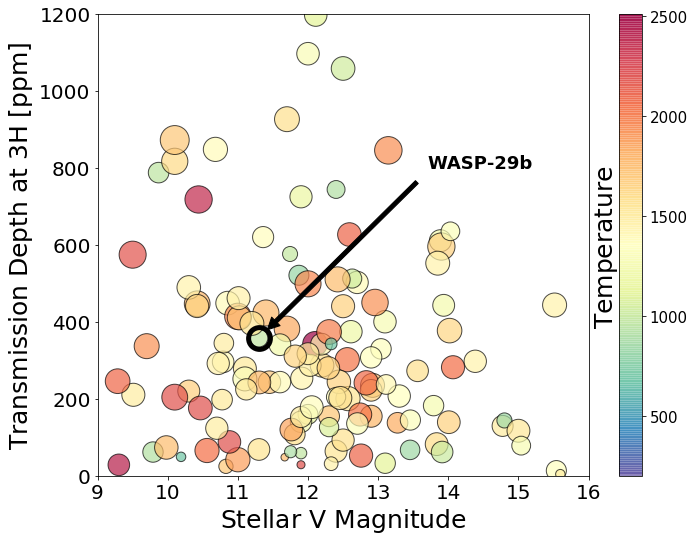

In [84]:
plt.figure(figsize=(11,8.5))
plt.scatter(mag,ABSORP*10**6,s=400*planetradius,c=planettemp,edgecolor='black',alpha=0.7,label='$\mathrm{Magellan}$ $\mathrm{Candidates}$',cmap=matplotlib.cm.Spectral_r)

plt.plot(mag[107],ABSORP[107]*10**6.,'.',markersize=55*planetradius[107],markerfacecolor='none',markeredgecolor='black',markeredgewidth=5.0)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=15)

#for i in range(0,len(planetname)):
#    if not np.isfinite(mag[i]) or not np.isfinite(ABSORP[i]):
#        continue
#    if mag[i]>9 and mag[i]<16:
#        if ABSORP[i]>0 and ABSORP[i]<1500:
#            if planetradius[i]>0.0 and planetradius[i]<0.6:
#                plt.text(mag[i]-0.1,ABSORP[i]*10**6.,str(int(i)),color='black',fontweight='bold')
#plt.text(mag[26]-1.0,ABSORP[26]*10**6,'Hat-P-26b',fontsize=18,fontweight='bold')
plt.annotate('WASP-29b',xy=(mag[107],ABSORP[107]*10**6),xytext=(13.7,800),fontsize=18,fontweight='bold',arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim(0,1200)
plt.xlim(9,16)
plt.tick_params(labelsize=20)

plt.ylabel('$\mathrm{Transmission}$ $\mathrm{Depth}$ $\mathrm{at}$ $3\mathrm{H}$ $\mathrm{[ppm]}$',fontsize=25)
plt.xlabel('$\mathrm{Stellar}$ $\mathrm{V}$ $\mathrm{Magnitude}$',fontsize=25)
plt.figtext(0.75,0.5,'$\mathrm{Temperature}$',rotation='vertical',fontsize=25,fontweight='bold',va='center')
plt.savefig('transm_depth_2017B.eps')

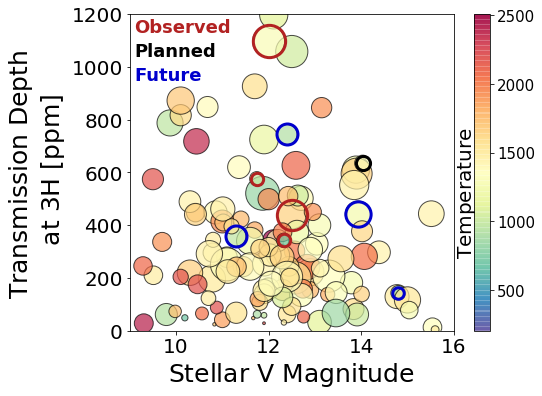

In [109]:
obsc='firebrick'
futc='mediumblue'

plt.figure(figsize=(7.5,5.5))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.25,right=1)
plt.scatter(mag,ABSORP*10**6,s=400*trans,c=planettemp,edgecolor='black',alpha=0.7,label='$\mathrm{Magellan}$ $\mathrm{Candidates}$',cmap=matplotlib.cm.Spectral_r)

plt.plot(mag[64],ABSORP[64]*10**6.,'.',markersize=44*trans[64],markerfacecolor='none',markeredgecolor='black',markeredgewidth=3.0)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=15)

plt.plot(mag[43],ABSORP[43]*10**6.,'.',markersize=48*trans[43],markerfacecolor='none',markeredgecolor=obsc,markeredgewidth=3.0)
plt.plot(mag[30],ABSORP[30]*10**6.,'.',markersize=29*trans[30],markerfacecolor='none',markeredgecolor=obsc,markeredgewidth=3.0)
plt.plot(mag[23],ABSORP[23]*10**6.,'.',markersize=25*trans[23],markerfacecolor='none',markeredgecolor=obsc,markeredgewidth=3.0)
plt.plot(mag[163],ABSORP[163]*10**6.,'.',markersize=48*trans[163],markerfacecolor='none',markeredgecolor=obsc,markeredgewidth=3.0)


plt.plot(mag[103],ABSORP[103]*10**6.,'.',markersize=42*trans[103],markerfacecolor='none',markeredgecolor=futc,markeredgewidth=3.0)
plt.plot(mag[105],ABSORP[105]*10**6.,'.',markersize=42*trans[105],markerfacecolor='none',markeredgecolor=futc,markeredgewidth=3.0)
#plt.plot(mag[64],ABSORP[64]*10**6.,'.',markersize=42*trans[64],markerfacecolor='none',markeredgecolor=futc,markeredgewidth=3.0)
plt.plot(mag[107],ABSORP[107]*10**6.,'.',markersize=44*trans[107],markerfacecolor='none',markeredgecolor=futc,markeredgewidth=3.0)
plt.plot(mag[26],ABSORP[26]*10**6.,'.',markersize=30*trans[26],markerfacecolor='none',markeredgecolor=futc,markeredgewidth=3.0)


#for i in range(0,len(planetname)):
#    if not np.isfinite(mag[i]) or not np.isfinite(ABSORP[i]):
#        continue
#    if mag[i]>9 and mag[i]<16:
#        if ABSORP[i]>0 and ABSORP[i]<1500:
#            if planetradius[i]>0.0 and planetradius[i]<0.6:
#                plt.text(mag[i]-0.1,ABSORP[i]*10**6.,str(int(i)),color='black',fontweight='bold')
#plt.text(mag[26]-1.0,ABSORP[26]*10**6,'Hat-P-26b',fontsize=18,fontweight='bold')
#plt.annotate('WASP-29b',xy=(mag[107],ABSORP[107]*10**6),xytext=(13.7,800),fontsize=18,fontweight='bold',arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim(0,1200)
plt.xlim(9,16)
plt.tick_params(labelsize=20)

plt.annotate('Observed',xy=(9.1,1130),color=obsc,fontsize=18,fontweight='bold')
plt.annotate('Planned',xy=(9.1,1040),color='black',fontsize=18,fontweight='bold')
plt.annotate('Future',xy=(9.1,950),color=futc,fontsize=18,fontweight='bold')

plt.ylabel('$\mathrm{Transmission}$ $\mathrm{Depth}$ \n $\mathrm{at}$ $3\mathrm{H}$ $\mathrm{[ppm]}$',fontsize=25)
plt.xlabel('$\mathrm{Stellar}$ $\mathrm{V}$ $\mathrm{Magnitude}$',fontsize=25)
plt.figtext(0.855,0.5,'$\mathrm{Temperature}$',rotation='vertical',fontsize=20,fontweight='bold',va='center')
plt.savefig('poster_tdepth_trans.pdf',transparent=True)

([], <a list of 0 Text xticklabel objects>)

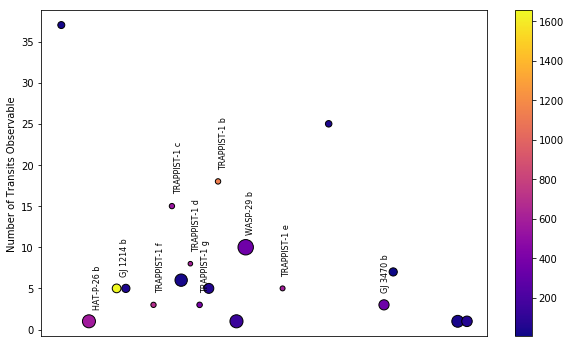

In [176]:
#general figure 
smallplanets=np.array([])
smalltrans=np.array([])
smallABSORP=np.array([])
smallradius=np.array([])
for i in range(0,len(uniquenames)):
    if planetradius[i]<0.8:
        smallplanets=np.append(smallplanets,uniquenames[i])
        smalltrans=np.append(smalltrans,numtrans[i])
        smallABSORP=np.append(smallABSORP,ABSORP[i])
        smallradius=np.append(smallradius,planetradius[i])
        
        
plt.figure(figsize=(10,6))
plt.scatter(np.linspace(0,len(smalltrans),len(smalltrans)),smalltrans,s=300*smallradius,edgecolor='black',c=smallABSORP*10**6.,cmap=matplotlib.cm.plasma)#markerfacecolor='coral')
cbar=plt.colorbar()
for n in range(0,len(smallplanets)):
    if smallABSORP[n]*10**6.>150.0:
        plt.annotate(smallplanets[n],xy=(n+0.5,smalltrans[n]+1.5),rotation='vertical',va='bottom',ha='left',color='black',fontsize=8)
#plt.ylim(0,60)
plt.ylabel('Number of Transits Observable')
plt.xticks([],[])
#plt.show()
#plt.savefig('NumberofTranists_2017B.eps')

In [62]:
a=23
print planetname[a]
print numtrans[a]
#print planetmass[a]
print planetradius[a] *2.8474, planetradius[a]
print ABSORP[a]*10**6.
print planettemp[a]
print mag[a]
print transit[a]
print (planetradius[a]/starradius[a])**2.
#print startemp[a]
#print starradius[a]
#print planetau[a]
#print planetdensity[a]
#print g[a]
for i in range(0,len(names)):
    if names[i]==planetname[a]:
        print t[i].isot

WASP-52 b
11.0
3.616198 1.27
1096.18649372
1299.63956215
12.0
2.71
2.58436148053
2017-07-18T09:49:55.488
2017-08-24T03:43:16.320
2017-08-31T03:42:00.288
2017-09-07T03:40:44.256
2017-09-14T03:39:28.224
2017-09-21T03:38:12.192
2017-09-28T03:36:55.296
2017-10-05T03:35:39.264
2017-10-12T03:34:23.232
2017-10-19T03:33:07.200
2017-10-26T03:31:51.168


In [61]:
print np.where(hostname=='WASP-52')

(array([23]),)


In [49]:
for i in range(0,len(planetname)):
    if mag[i]<9.0:# and mag[i]>14.0:
#    if ABSORP[i]*10**6.<400:# and ABSORP[i]*10**6. >200:
#    if planetradius[i]<0.7:
        print planetname[i], planetletter[i]

HD 3167 b
HIP 41378 b
HIP 41378 c


In [23]:
print planetname

['CoRoT-1' 'CoRoT-10' 'CoRoT-12' 'CoRoT-13' 'CoRoT-16' 'CoRoT-18'
 'CoRoT-19' 'CoRoT-2' 'CoRoT-20' 'CoRoT-22' 'CoRoT-25' 'CoRoT-26'
 'CoRoT-27' 'CoRoT-29' 'CoRoT-3' 'CoRoT-4' 'CoRoT-5' 'CoRoT-6' 'CoRoT-7'
 'CoRoT-8' 'GJ 1132' 'GJ 1132' 'GJ 1214' 'GJ 3470' 'HAT-P-23' 'HAT-P-24'
 'HAT-P-26' 'HAT-P-27' 'HAT-P-30' 'HAT-P-34' 'HAT-P-35' 'HAT-P-39'
 'HAT-P-41' 'HAT-P-42' 'HAT-P-43' 'HAT-P-45' 'HAT-P-46' 'HAT-P-50'
 'HAT-P-57' 'HAT-P-65' 'HATS-1' 'HATS-10' 'HATS-13' 'HATS-14' 'HATS-15'
 'HATS-16' 'HATS-17' 'HATS-2' 'HATS-25' 'HATS-26' 'HATS-27' 'HATS-28'
 'HATS-29' 'HATS-3' 'HATS-30' 'HATS-4' 'HATS-5' 'HATS-6' 'HATS-8' 'HATS-9'
 'HD 209458' 'HD 3167' 'HIP 41378' 'HIP 41378' 'K2-10' 'K2-12' 'K2-14'
 'K2-15' 'K2-19' 'K2-21' 'K2-27' 'K2-28' 'K2-3' 'K2-31' 'K2-33' 'K2-36'
 'K2-36' 'K2-37' 'K2-38' 'K2-38' 'K2-39' 'K2-4' 'K2-43' 'K2-45' 'K2-49'
 'K2-52' 'K2-55' 'K2-58' 'K2-58' 'K2-59' 'K2-6' 'K2-61' 'K2-62' 'K2-62'
 'K2-64' 'K2-68' 'K2-69' 'K2-7' 'K2-72' 'K2-75' 'K2-8' 'K2-83' 'K2-85'
 'KELT-10' 'K

In [64]:
print trans[23]

2.58436148053
